In [2]:
import polars as pl
import plotly.express as px
import matplotlib.pyplot as plt


In [3]:
# Load the data into a Pandas DataFrame
df = pl.read_csv('../rtf/joined_data.csv')
print(df.shape)

(59223, 18)


In [4]:
# Group the data by Seller and count the number of transactions
seller_counts = df.groupby("Seller", maintain_order=True).agg(pl.count())
seller_sorted_top10 = seller_counts.sort("count", descending=True).head(10)

# Calculate the count for the "other" category
other_count = seller_counts.sum()["count"][0] - seller_sorted_top10 .sum()["count"][0]
others_df = pl.DataFrame({"Seller": "other countries", "count": other_count})
others_df = others_df.with_columns([pl.col("count").cast(pl.Int64, strict=False)])
seller_sorted_top10 = seller_sorted_top10.with_columns([pl.col("count").cast(pl.Int64, strict=False)])
new_df = pl.concat([seller_sorted_top10, others_df], rechunk=True)


# Create a polar pie chart of the top sellers
px.pie(new_df,
       names = new_df.select('Seller').to_series(),
       values = new_df.select("count").to_series(),
       color_discrete_sequence = px.colors.sequential.Plasma_r,
       title="Top 10 Sellers")



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'label=%{label}<br>value=%{value}<extra></extra>',
              'labels': array(['United States', 'Soviet Union', 'France', 'United Kingdom', 'Germany',
                               'Russia', 'China', 'Italy', 'Israel', 'Netherlands', 'other countries'],
                              dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie',
              'values': array([18520,  9376,  5528,  4140,  2931,  2738,  2144,  1982,  1438,  1137,
                                9289], dtype=int64)}],
    'layout': {'legend': {'tracegroupgap': 0},
               'piecolorway': [#f0f921, #fdca26, #fb9f3a, #ed7953, #d8576b,
                               #bd3786, #9c179e, #7201a8, #46039f, #0d0887],
               'template': '...',
               'title': {'text': 'Top 10 Sellers'}}
})

In [7]:
# Group the data by Seller and count the number of transactions
Buyer_counts = df.groupby("Buyer", maintain_order=True).agg(pl.count())
Buyer_sorted_top10 = Buyer_counts.sort("count", descending=True).head(10)

# Calculate the count for the "other" category
other_count = Buyer_counts.sum()["count"][0] - Buyer_sorted_top10.sum()["count"][0]
others_df = pl.DataFrame({'Buyer': "other countries", "count": other_count})
others_df = others_df.with_columns([pl.col("count").cast(pl.Int64, strict=False)])
Buyer_sorted_top10 = Buyer_sorted_top10.with_columns([pl.col("count").cast(pl.Int64, strict=False)])
new_df = pl.concat([Buyer_sorted_top10, others_df], rechunk=True)

# Create a polar pie chart of the top sellers
px.pie(df,
       names = Buyer_sorted_top10.select('Buyer').to_series(),
       values = Buyer_sorted_top10.select("count").to_series(),
       color_discrete_sequence=px.colors.sequential.Viridis,
       title="Top 10 buyers")


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'label=%{label}<br>value=%{value}<extra></extra>',
              'labels': array(['India', 'Japan', 'Egypt', 'Turkiye', 'South Korea', 'Saudi Arabia',
                               'Pakistan', 'Iraq', 'China', 'Greece'], dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie',
              'values': array([2604, 1772, 1472, 1387, 1312, 1301, 1266, 1171, 1103, 1097], dtype=int64)}],
    'layout': {'legend': {'tracegroupgap': 0},
               'piecolorway': [#440154, #482878, #3e4989, #31688e, #26828e,
                               #1f9e89, #35b779, #6ece58, #b5de2b, #fde725],
               'template': '...',
               'title': {'text': 'Top 10 buyers'}}
})

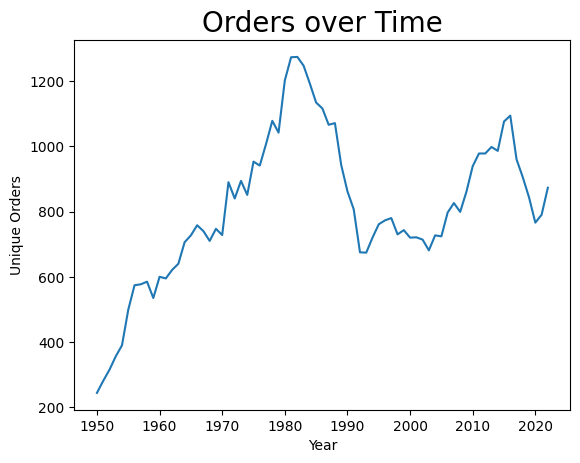

In [10]:
# calculate the order counts for each year
order_counts = df.groupby("Delivery year", maintain_order=True).agg(pl.count())
fig, ax = plt.subplots()


plt.plot(order_counts["Delivery year"], order_counts["count"])
plt.title(r'Orders over Time', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Unique Orders')
plt.show()


In [12]:
# Group the data by Armament category and count the number of transactions
categoryTraded = df.groupby("Armament category", maintain_order=True).agg(pl.count())

# Create a polar pie chart of how much each category is traded
px.pie(df,
       names = categoryTraded.select('Armament category').to_series(),
       values = categoryTraded.select("count").to_series(),
       color_discrete_sequence=px.colors.sequential.Viridis,
       title="Sales by Category")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'label=%{label}<br>value=%{value}<extra></extra>',
              'labels': array(['Aircraft', 'Armoured vehicles', 'Ships', 'Artillery', 'Engines',
                               'Sensors', 'Naval weapons', 'Air defence systems', 'Missiles', 'Other',
                               'Satellites'], dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie',
              'values': array([17336,  8523,  3858,  3725,  4754,  5547,  1442,  1643, 11936,   447,
                                  12], dtype=uint32)}],
    'layout': {'legend': {'tracegroupgap': 0},
               'piecolorway': [#440154, #482878, #3e4989, #31688e, #26828e,
                               #1f9e89, #35b779, #6ece58, #b5de2b, #fde725],
               'template': '...',
               'title': {'text': 'Sales by Category'}}
})

In [13]:
keys = df.select("Armament category").unique().rows()
#Puts them in a weird list of tuples, so we need to get the first element of each tuple
newDF = pl.DataFrame(schema={'Armament category':str,'count':pl.Int64})
for key in keys:
 
    weaponsOfType = df.filter(pl.col("Armament category") == key[0])
    summated = weaponsOfType.select("Numbers delivered").sum()
    newDF = pl.concat([newDF, pl.DataFrame({"Armament category": key[0], "count":summated.rows()[0][0]})], rechunk=True)
# Create a polar pie chart of how much each category is traded
px.pie(newDF,
       names = newDF.select('Armament category').to_series(),
       values = newDF.select("count").to_series(),
       color_discrete_sequence=px.colors.sequential.Viridis,
       title="Armament category sales by quantity of weapons traded <br><sup>Some of the numbers delivered are estimates</sup>"

       
       )

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'label=%{label}<br>value=%{value}<extra></extra>',
              'labels': array(['Aircraft', 'Armoured vehicles', 'Ships', 'Artillery', 'Engines',
                               'Sensors', 'Naval weapons', 'Air defence systems', 'Missiles', 'Other',
                               'Satellites'], dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie',
              'values': array([ 170329,  466479,    8072,  124034,  119375,   25383,    3311,   21474,
                               2621287,   26902,      12], dtype=int64)}],
    'layout': {'legend': {'tracegroupgap': 0},
               'piecolorway': [#440154, #482878, #3e4989, #31688e, #26828e,
                               #1f9e89, #35b779, #6ece58, #b5de2b, #fde725],
               'template': '...',
               'title': {'text': ('Armament category sales by num' ... ' delivered are estimates</sup>')}}
})